In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
from sklearn.pipeline import Pipeline

In [3]:
pres_path = "1976-2020-president.csv"
county_path = "countypres_2000-2020.csv"
unemployment_path = "Unemployment.csv"
education_path = "Education.csv"

In [4]:
pres_df = pd.read_csv(pres_path)
county_df = pd.read_csv(county_path)
unemployment_df = pd.read_csv(unemployment_path)
education_df = pd.read_csv(education_path, encoding='ISO-8859-1')

In [5]:
virginia_pres_df = pres_df[pres_df["state"] == "VIRGINIA"]
filtered_virginia_pres_df = virginia_pres_df[(virginia_pres_df['year'] >= 2000) & (virginia_pres_df['year'] <= 2020)]
filtered_virginia_pres_df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
2374,2000,VIRGINIA,VA,51,54,40,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,1437490,2739447,20210113,NaN,REPUBLICAN
2375,2000,VIRGINIA,VA,51,54,40,US PRESIDENT,"GORE, AL",DEMOCRAT,False,1217290,2739447,20210113,NaN,DEMOCRAT
2376,2000,VIRGINIA,VA,51,54,40,US PRESIDENT,"NADER, RALPH",GREEN,False,59398,2739447,20210113,NaN,OTHER
2377,2000,VIRGINIA,VA,51,54,40,US PRESIDENT,"BROWNE, HARRY",LIBERTARIAN,False,15198,2739447,20210113,NaN,LIBERTARIAN
2378,2000,VIRGINIA,VA,51,54,40,US PRESIDENT,"BUCHANAN, PATRICK """"PAT""""",REFORM PARTY,False,5455,2739447,20210113,NaN,OTHER
2379,2000,VIRGINIA,VA,51,54,40,US PRESIDENT,NaN,NaN,True,2807,2739447,20210113,NaN,OTHER
2380,2000,VIRGINIA,VA,51,54,40,US PRESIDENT,"PHILLIPS, HOWARD",CONSERVATIVE,False,1809,2739447,20210113,NaN,OTHER
2697,2004,VIRGINIA,VA,51,54,40,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,1716959,3195415,20210113,NaN,REPUBLICAN
2698,2004,VIRGINIA,VA,51,54,40,US PRESIDENT,"KERRY, JOHN",DEMOCRAT,False,1454742,3195415,20210113,NaN,DEMOCRAT
2699,2004,VIRGINIA,VA,51,54,40,US PRESIDENT,"BADNARIK, MICHAEL",LIBERTARIAN,False,11032,3195415,20210113,NaN,LIBERTARIAN


The other two datasets provide county fips so it probably doesn't make sense to use state fips in the complete dataset

In [6]:
virginia_county_df = county_df[county_df["state"] == "VIRGINIA"]
filtered_virginia_county_df = virginia_county_df[(virginia_county_df['year'] >= 2000) & (virginia_county_df['year'] <= 2020)]
filtered_virginia_county_df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
11160,2000,VIRGINIA,VA,ACCOMACK,51001.0,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
11161,2000,VIRGINIA,VA,ACCOMACK,51001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
11162,2000,VIRGINIA,VA,ACCOMACK,51001.0,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
11163,2000,VIRGINIA,VA,ACCOMACK,51001.0,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
11164,2000,VIRGINIA,VA,ALBEMARLE,51003.0,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
71965,2020,VIRGINIA,VA,WINCHESTER CITY,51840.0,US PRESIDENT,OTHER,OTHER,24,12113,20220315,ELECTION DAY
71966,2020,VIRGINIA,VA,WINCHESTER CITY,51840.0,US PRESIDENT,OTHER,OTHER,0,12113,20220315,PROVISIONAL
71967,2020,VIRGINIA,VA,WINCHESTER CITY,51840.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
71968,2020,VIRGINIA,VA,WINCHESTER CITY,51840.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


In [7]:
unemployment_df

,FIPS_Code,State,Area_Name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,142601576.0
1,0,US,United States,Employed_2000,136904853.0
2,0,US,United States,Unemployed_2000,5696723.0
3,0,US,United States,Unemployment_rate_2000,4.0
4,0,US,United States,Civilian_labor_force_2001,143786537.0
...,...,...,...,...,...
316628,72153,PR,"Yauco Municipio, PR",Unemployment_rate_2021,11.7
316629,72153,PR,"Yauco Municipio, PR",Civilian_labor_force_2022,10353.0
316630,72153,PR,"Yauco Municipio, PR",Employed_2022,9282.0
316631,72153,PR,"Yauco Municipio, PR",Unemployed_2022,1071.0


In [8]:
# Filter the original dataframe to select only rows where the state is Virginia
virginia_unemployment_df = unemployment_df[unemployment_df["State"] == "VA"]
virginia_unemployment_df2 = virginia_unemployment_df.copy()

# Extract the employment attribute and year from the 'Attribute' column
attributes = virginia_unemployment_df2['Attribute'].str.extract('(?P<Employment_Attribute>.*?)(?P<Year>\d{4})$')

# Add the extracted year and employment attribute to the dataframe
virginia_unemployment_df2['Year'] = attributes['Year'].astype(int)
virginia_unemployment_df2['Employment_Attribute'] = attributes['Employment_Attribute'].str.rstrip('_')

# Define a list of allowed employment attributes
allowed_attributes = ['Civilian_labor_force', 'Employed', 'Unemployed', 'Unemployment_rate']

# Filter the dataframe to keep rows where the year is between 2000 and 2020 and the Employment_Attribute is in the allowed list
filtered_virginia_unemployment_df = virginia_unemployment_df2[
    (virginia_unemployment_df2['Year'] >= 2000) &
    (virginia_unemployment_df2['Year'] <= 2020) &
    (virginia_unemployment_df2['Employment_Attribute'].isin(allowed_attributes))
]

# Drop the 'Attribute' column and rename the 'Value' column
filtered_virginia_unemployment_df = filtered_virginia_unemployment_df.drop(columns=['Attribute'])
filtered_virginia_unemployment_df = filtered_virginia_unemployment_df.rename(columns={'Value': 'Employment_Value'})

filtered_virginia_unemployment_df

,FIPS_Code,State,Area_Name,Employment_Value,Year,Employment_Attribute
277743,51000,VA,Virginia,3606390.0,2000,Civilian_labor_force
277744,51000,VA,Virginia,3524481.0,2000,Employed
277745,51000,VA,Virginia,81909.0,2000,Unemployed
277746,51000,VA,Virginia,2.3,2000,Unemployment_rate
277747,51000,VA,Virginia,3681107.0,2001,Civilian_labor_force
...,...,...,...,...,...,...
290723,51840,VA,"Winchester city, VA",2.8,2019,Unemployment_rate
290724,51840,VA,"Winchester city, VA",14599.0,2020,Civilian_labor_force
290725,51840,VA,"Winchester city, VA",13699.0,2020,Employed
290726,51840,VA,"Winchester city, VA",900.0,2020,Unemployed


In [9]:
education_df
virginia_education_df = education_df[education_df["State"] == "VA"]
virginia_education_df2 = virginia_education_df.copy()
unique_values = virginia_education_df2["Attribute"].unique()
print(unique_values)

['Less than a high school diploma, 1970' 'High school diploma only, 1970'
 'Some college (1-3 years), 1970' 'Four years of college or higher, 1970'
 'Percent of adults with less than a high school diploma, 1970'
 'Percent of adults with a high school diploma only, 1970'
 'Percent of adults completing some college (1-3 years), 1970'
 'Percent of adults completing four years of college or higher, 1970'
 'Less than a high school diploma, 1980' 'High school diploma only, 1980'
 'Some college (1-3 years), 1980' 'Four years of college or higher, 1980'
 'Percent of adults with less than a high school diploma, 1980'
 'Percent of adults with a high school diploma only, 1980'
 'Percent of adults completing some college (1-3 years), 1980'
 'Percent of adults completing four years of college or higher, 1980'
 'Less than a high school diploma, 1990' 'High school diploma only, 1990'
 "Some college or associate's degree, 1990"
 "Bachelor's degree or higher, 1990"
 'Percent of adults with less than a 

I will merge the county and unemployment dataframe since their values align the most

In [10]:
# converting their years to ints
filtered_virginia_county_df['year'] = filtered_virginia_county_df['year'].astype(int)
filtered_virginia_unemployment_df['Year'] = filtered_virginia_unemployment_df['Year'].astype(int)
# converting their fips to ints
filtered_virginia_county_df['county_fips'] = filtered_virginia_county_df['county_fips'].astype(int)
filtered_virginia_unemployment_df['FIPS_Code'] = filtered_virginia_unemployment_df['FIPS_Code'].astype(int)

# merge the datasets on year and the county identifier
merged_df = pd.merge(filtered_virginia_county_df, filtered_virginia_unemployment_df, left_on=['year', 'county_fips'], right_on=['Year', 'FIPS_Code'], how='inner')
merged_df.drop(columns=['year', 'FIPS_Code', 'state','state_po', 'version','Area_Name'], inplace=True)
merged_df

,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,mode,State,Employment_Value,Year,Employment_Attribute
0,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,TOTAL,VA,18130.0,2000,Civilian_labor_force
1,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,TOTAL,VA,17592.0,2000,Employed
2,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,TOTAL,VA,538.0,2000,Unemployed
3,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,TOTAL,VA,3.0,2000,Unemployment_rate
4,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,TOTAL,VA,18130.0,2000,Civilian_labor_force
...,...,...,...,...,...,...,...,...,...,...,...,...
14875,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,ELECTION DAY,VA,6.2,2020,Unemployment_rate
14876,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,26,12113,PROVISIONAL,VA,14599.0,2020,Civilian_labor_force
14877,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,26,12113,PROVISIONAL,VA,13699.0,2020,Employed
14878,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,26,12113,PROVISIONAL,VA,900.0,2020,Unemployed


In [11]:
missing_values_count = merged_df.isnull().sum()

# This will print the count of missing values for each column
print(missing_values_count)

# Check for columns with any missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]
print(columns_with_missing_values)

percentage_missing = merged_df.isnull().mean() * 100
print(percentage_missing)

county_name             0
county_fips             0
office                  0
candidate               0
party                   0
candidatevotes          0
totalvotes              0
mode                    0
State                   0
Employment_Value        0
Year                    0
Employment_Attribute    0
dtype: int64
Series([], dtype: int64)
county_name             0.0
county_fips             0.0
office                  0.0
candidate               0.0
party                   0.0
candidatevotes          0.0
totalvotes              0.0
mode                    0.0
State                   0.0
Employment_Value        0.0
Year                    0.0
Employment_Attribute    0.0
dtype: float64


In [12]:
def plot_civilian_labor_force(employment_df, county_fips, start_year, end_year):
    """
    Plots the Civilian Labor Force for a specified county FIPS code and year range.

    Parameters:
    employment_df (DataFrame): Pandas DataFrame containing employment data.
    county_fips (int): FIPS code of the county to plot.
    start_year (int): Starting year of the range to plot.
    end_year (int): Ending year of the range to plot.
    """
    # Filter the DataFrame for the county and the 'Civilian_labor_force'
    county_labor_force = employment_df[
        (employment_df['county_fips'] == county_fips) &
        (employment_df['Year'] >= start_year) &
        (employment_df['Year'] <= end_year) &
        (employment_df['Employment_Attribute'] == 'Civilian_labor_force')
    ]

    # Check if any data is available for plotting
    if county_labor_force.empty:
        print(f"No data available for county_fips {county_fips} between years {start_year} and {end_year}.")
        return

    # Plot the filtered data
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(county_labor_force['Year'], county_labor_force['Employment_Value'], marker='o', linestyle='-')

    # Add title and labels
    plt.title(f"Civilian Labor Force from {start_year} to {end_year} for county_fips {county_fips}")
    plt.xlabel('Year')
    plt.ylabel('Civilian Labor Force')

    # Show grid (optional)
    plt.grid(True)

    # Optionally, you can add plt.xticks() to ensure each year is marked clearly
    plt.xticks(range(start_year, end_year + 1), rotation=45)

    # Show the plot
    plt.show()

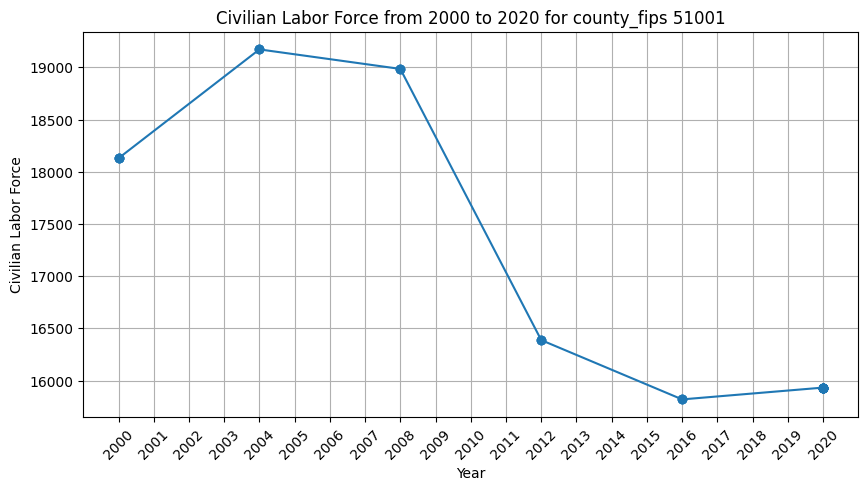

In [13]:
plot_civilian_labor_force(merged_df, 51001, 2000, 2020)

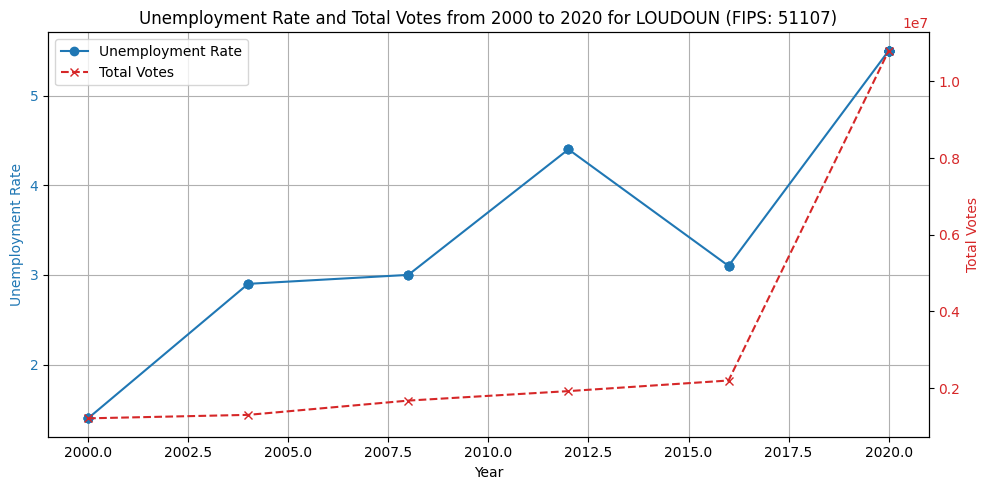

In [14]:

def plot_labor_force_and_votes(merged_df, county_fips, start_year, end_year):
    """
    Plots the Unemployment_rate and Total Votes for a specified county FIPS code and year range, displaying county_name.

    Parameters:
    merged_df (DataFrame): Pandas DataFrame containing merged employment and voting data.
    county_fips (int): FIPS code of the county to plot.
    start_year (int): Starting year of the range to plot.
    end_year (int): Ending year of the range to plot.
    """
    # Find the county_name for the provided county_fips
    county_names = merged_df[merged_df['county_fips'] == county_fips]['county_name'].unique()
    if len(county_names) == 0:
        print(f"No county found with FIPS code {county_fips}.")
        return
    county_name = county_names[0]  # Assuming one unique county_name per county_fips code

    # Filter the DataFrame for the Unemployment_rate data
    labor_force_data = merged_df[
        (merged_df['county_fips'] == county_fips) &
        (merged_df['Year'] >= start_year) &
        (merged_df['Year'] <= end_year) &
        (merged_df['Employment_Attribute'] == 'Unemployment_rate')
    ]

    # Filter the DataFrame for Total Votes data
    votes_data = merged_df[
        (merged_df['county_fips'] == county_fips) &
        (merged_df['Year'] >= start_year) &
        (merged_df['Year'] <= end_year)
    ].groupby('Year')['totalvotes'].sum().reset_index()  # Summing total votes per year

    # Check if data is available for plotting
    if labor_force_data.empty or votes_data.empty:
        print(f"No data available for {county_name} between years {start_year} and {end_year}.")
        return

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot Unemployment_rate
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Unemployment Rate', color='tab:blue')
    ax1.plot(labor_force_data['Year'], labor_force_data['Employment_Value'], color='tab:blue', marker='o', label='Unemployment Rate')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a twin Axes sharing the same x-axis for Total Votes
    ax2 = ax1.twinx()
    ax2.set_ylabel('Total Votes', color='tab:red')
    ax2.plot(votes_data['Year'], votes_data['totalvotes'], color='tab:red', marker='x', linestyle='--', label='Total Votes')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Title and grid
    plt.title(f"Unemployment Rate and Total Votes from {start_year} to {end_year} for {county_name} (FIPS: {county_fips})")
    ax1.grid(True)

    # Legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    # Show plot with tight layout to fit twin axes
    fig.tight_layout()
    plt.show()

# Example usage:
plot_labor_force_and_votes(merged_df, 51107, 2000, 2020)

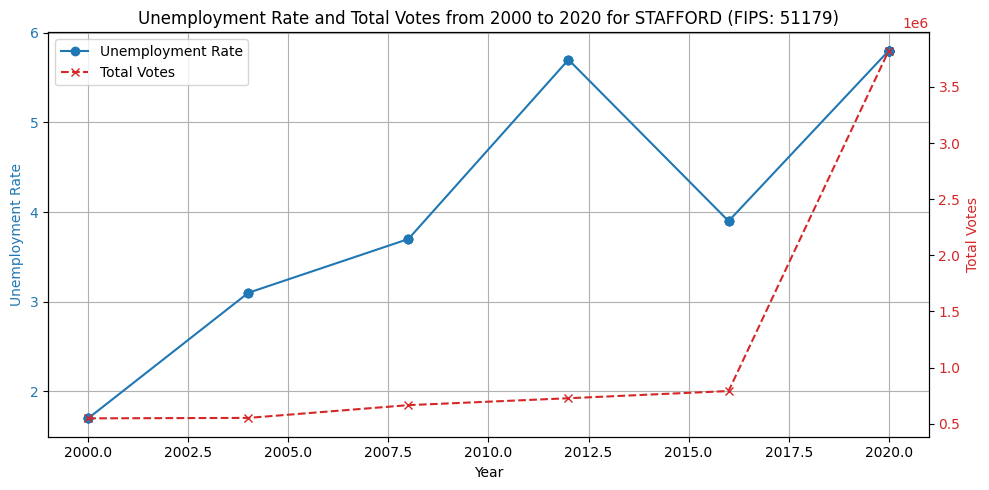

In [15]:
plot_labor_force_and_votes(merged_df, 51179, 2000, 2020)

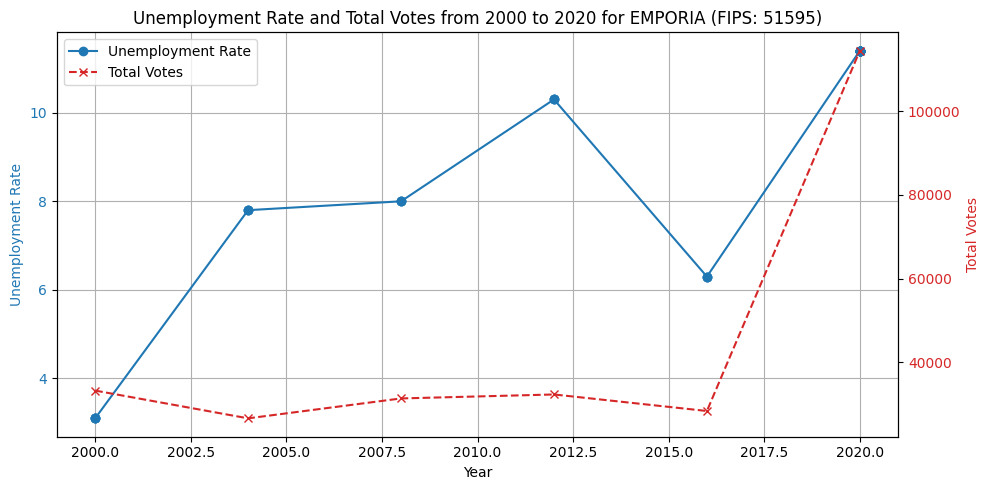

In [16]:
plot_labor_force_and_votes(merged_df, 51595, 2000, 2020)

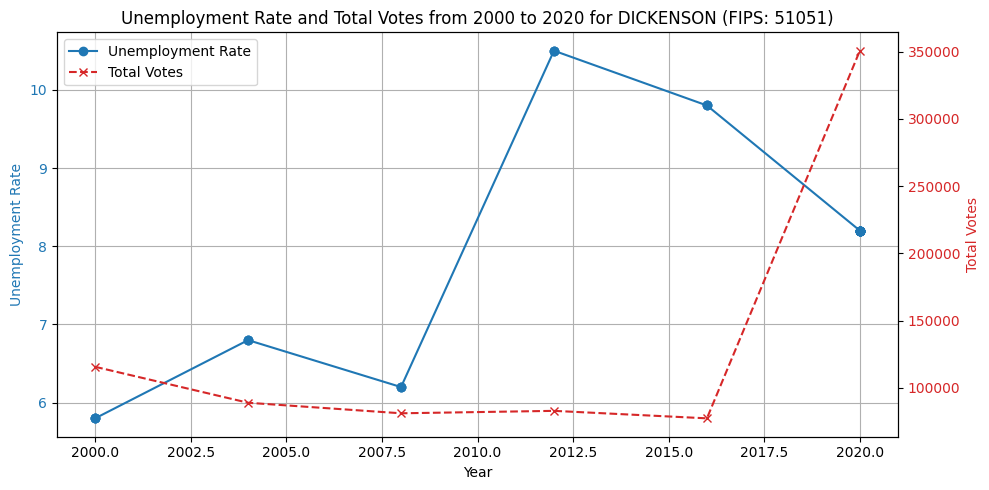

In [17]:
plot_labor_force_and_votes(merged_df, 51051, 2000, 2020)

Here are four plots showing the unemployment rate and total votes in counties with significantly different incomes. I feel that it's hard to tell the difference or gain any conclusions from the plots. Therefore, the next step is to look at the correlation matrix.

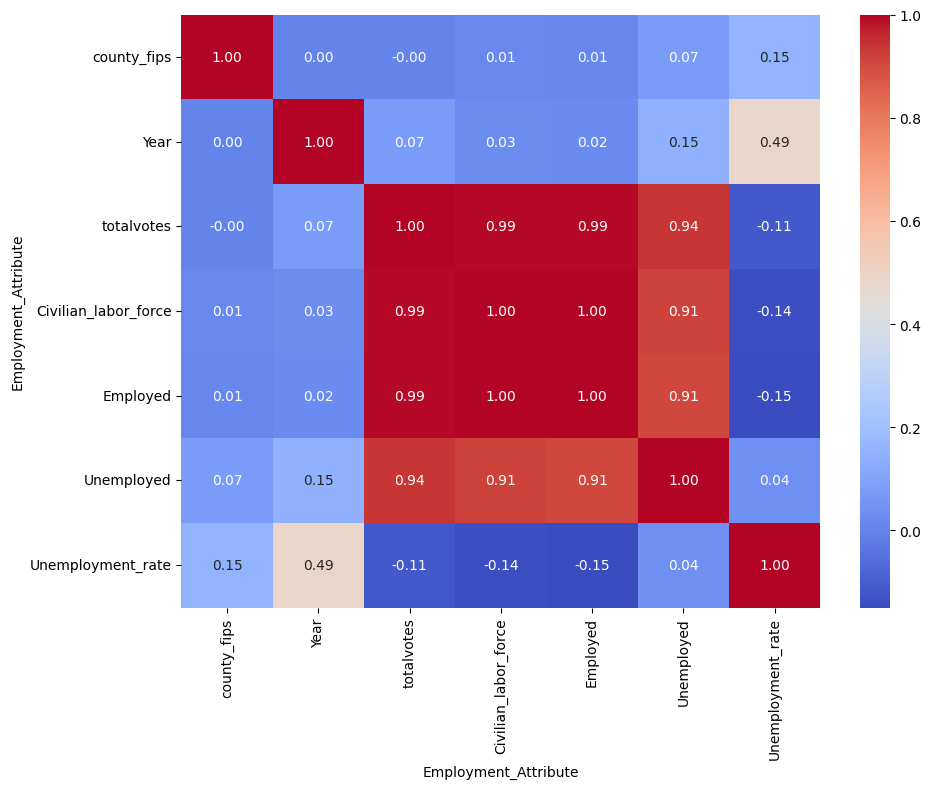

In [18]:
pivot_df = merged_df.pivot_table(index=["county_fips", "Year", "totalvotes"],
                                 columns='Employment_Attribute',
                                 values='Employment_Value',
                                 aggfunc='first').reset_index()
correlation_matrix = pivot_df.corr()

# Use seaborn to create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# You might want to put the following line if you're facing an issue with tight layout, especially if labels are being cut
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
print(correlation_matrix[['totalvotes']])

Employment_Attribute  totalvotes
Employment_Attribute            
county_fips            -0.000419
Year                    0.073984
totalvotes              1.000000
Civilian_labor_force    0.993920
Employed                0.992501
Unemployed              0.937488
Unemployment_rate      -0.114170


**county_fips:** no relationship

**Year:** There's a positive correlation (0.073984), suggesting a slight tendency that total votes may increase as years go by. However, this correlation is weak.

totalvotes: 1 (itself)

**Civilian_labor_force:** The high positive correlation (0.993920) indicates a strong linear relationship between the size of the civilian labor force and total votes. It suggests that areas with larger civilian labor forces tend to have higher total votes, which makes sense as more populated areas will have more potential workers and voters.

**Employed:** Similarly to the civilian labor force, there's a very high correlation (0.992501) with the number of employed individuals. This suggests that the number of employed people in an area is a strong predictor of the total votes cast in that area.

**Unemployed:** There's also a high positive correlation (0.937488) between the number of unemployed individuals and total votes. While the relationship is strong, it is less strong than the employed or the size of the civilian labor force, possibly reflecting variations in how unemployment rates affect voter turnout or the proportion of eligible voters among the unemployed.

Unemployment_rate: The negative correlation (-0.114170) indicates a slight inverse relationship between unemployment rates and total votes. A higher unemployment rate might be associated with a slightly lower total vote count. This could be due to various socio-economic factors that impact both unemployment and voting behaviors, such as lower rates of political engagement or voter turnout among unemployed populations.

In [20]:
# This is the new dataframe after preprocessing
pivot_df

Employment_Attribute,county_fips,Year,totalvotes,Civilian_labor_force,Employed,Unemployed,Unemployment_rate
0,51001,2000,11925,18130.0,17592.0,538.0,3.0
1,51001,2004,13356,19173.0,18201.0,972.0,5.1
2,51001,2008,15623,18986.0,17964.0,1022.0,5.4
3,51001,2012,16051,16388.0,15123.0,1265.0,7.7
4,51001,2016,15818,15820.0,15060.0,760.0,4.8
...,...,...,...,...,...,...,...
793,51840,2004,9343,13660.0,13175.0,485.0,3.6
794,51840,2008,10126,14344.0,13640.0,704.0,4.9
795,51840,2012,10296,14223.0,13292.0,931.0,6.5
796,51840,2016,10667,14345.0,13780.0,565.0,3.9


# Using regression we want to determine how close we can get to the actual turnout

In [21]:
# Preparing the data
X = pivot_df.drop(['totalvotes', 'county_fips'], axis=1)  # Features (excluding 'totalvotes' which is the target variable)
y = pivot_df['totalvotes']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Random forest regressor
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predicting the test set results
y_pred = pipeline.predict(X_test)

# Calculate the performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 24401710.887178116
Root Mean Squared Error: 4939.808790548285


In [23]:
# Print out the feature importances
feature_importances = pipeline.named_steps['rf'].feature_importances_
feature_names = X.columns
print("Feature importances:")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance:.4f}")

Feature importances:
Year: 0.0026
Civilian_labor_force: 0.4805
Employed: 0.3063
Unemployed: 0.2089
Unemployment_rate: 0.0016


In [24]:
example_county_features = {
    'Year': [2021],
    'Civilian_labor_force': [19000], # fake number
    'Employed': [18000], # fake number
    'Unemployed': [1000], # fake number
    'Unemployment_rate': [5.2] # fake number
}
# Create a DataFrame for the features
example_county_df = pd.DataFrame.from_dict(example_county_features)

# Use the trained pipeline to predict 'totalvotes' for this county
predicted_totalvotes = pipeline.predict(example_county_df)

print(f"Predicted total votes for county_fips 51001 in the year 2021: {predicted_totalvotes[0]}")

Predicted total votes for county_fips 51001 in the year 2021: 20101.25


The actual values for 'Civilian_labor_force', 'Employed', 'Unemployed', and 'Unemployment_rate' are based on forecasts for that county and year. The model uses these features to make its prediction, not the county_fips code itself, because it's a label.

Overal the model performance is horrible. I plan on using cross validation next to see how it affects model performance.


In [25]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Random forest regressor
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE from the cross-validation scores (which are negative MSE)
rmse_cv = np.sqrt(-cv_scores)

print(f'Cross-validated RMSE scores: {rmse_cv}')
print(f'Mean RMSE: {np.mean(rmse_cv)}')
print(f'Standard Deviation of RMSE: {np.std(rmse_cv)}')

Cross-validated RMSE scores: [ 3972.37326113 60838.04053782  4592.87797073  3862.57572778
  5065.17585758]
Mean RMSE: 15666.20867100846
Standard Deviation of RMSE: 22590.115010614536


The wide variance in cross-validation results suggests that the model might not be very robust and the high variance RMSE also indicates that our dataset might have heterogeneous subgroups, and the model fails to generalize.

I plan to improve model accuracy by using stratified sampling or specialized models that can handle such variability.

In [26]:
# Preparing the data
X = pivot_df.drop(['totalvotes', 'county_fips'], axis=1)
y = pivot_df['totalvotes']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['Year'], random_state=42)
# Setting up a K-Fold cross-validation that shuffles data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
mse_scores = []

for train_index, test_index in kf.split(X):
    # Split into train and test for the fold
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate RMSE for each fold
rmse_scores = np.sqrt(mse_scores)

print(f"Cross-validated RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores)}")

Cross-validated RMSE scores: [ 4594.13402308  3079.65728889 12860.69501489  5002.77935462
  3517.899903  ]
Mean RMSE: 5811.033116896431
Standard Deviation of RMSE: 3593.0690022674767


The approach above ensures that there is representation across the years

In [27]:
# Preparing the data
X = pivot_df.drop(['totalvotes', 'county_fips'], axis=1)
y = pivot_df['totalvotes']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['Year'], random_state=42)
# Setting up a K-Fold cross-validation that shuffles data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = LinearRegression()

# Perform cross-validation
mse_scores = []

for train_index, test_index in kf.split(X):
    # Split into train and test for the fold
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate RMSE for each fold
rmse_scores = np.sqrt(mse_scores)

print(f"Cross-validated RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores)}")

Cross-validated RMSE scores: [5166.27059688 4068.30722799 6146.33212453 4324.27861707 4483.52714048]
Mean RMSE: 4837.743141392549
Standard Deviation of RMSE: 748.5294695164228


The cross-validated Root Mean Squared Error (RMSE) scores obtained from both RandomForestRegressor and LinearRegression provide metrics to estimate model performance, where a lower RMSE indicates a model that better fits the data.

**Random Forest Regressor:**
Mean RMSE: 5,811.03
Standard Deviation of RMSE: 3,593.07

The mean RMSE for the Random Forest model suggests that its predictions are, on average, approximately 5,811 votes away from the actual vote counts. A relatively high standard deviation indicates variability in the model's performance across different folds, suggesting that the model's accuracy depends on the specific data subset it's trained on, which may affect its ability to generalize.

**Linear Regression:**
Mean RMSE: 4,837.74
Standard Deviation of RMSE: 748.53

The Linear Regression model's lower mean RMSE indicates that it makes predictions closer to the actual values compared to the Random Forest model. Its lower standard deviation suggests more consistent performance across various data folds.

Although Linear Regression demonstrates more consistency across different subsets, the Random Forest model, with its greater complexity, has a higher potential to capture complex relationships in the data. Neither model is fully optimized. We plan to optimize in the future. In analyzing the data, we noted significant missing values, leading us to rely on just two of our proposed datasets for modeling. This limitation, however, has unveiled new potential factors affecting voter turnout, such as the population size of each county, which may have previously been overlooked in our search for datasets.

Future steps include:
  1. Sourcing a population dataset for the relevant date range.
  2. Employing classification models to categorize 'totalvotes' into bins (low, medium, high turnout).
  3. Exploring data visualization techniques.



# Using classification we want to estimate a range (FUTURE)

In [28]:
import tensorflow as tf

import sklearn


pop_df = pd.read_csv("populationByFips.csv")

pop_df_melted = pd.melt(pop_df, id_vars=['county_fips'], var_name='Year', value_name='Population')
pop_df_melted = pop_df_melted[pop_df_melted['Year'].str.isnumeric()]
pop_df_melted['Year'] = pop_df_melted['Year'].astype(int)

merged_df = pd.merge(pivot_df, pop_df_melted, how='inner', on=['county_fips', 'Year'])
merged_df['voter_percent'] = (merged_df['totalvotes'] / merged_df['Population']) * 100

print(merged_df)

#defines range
max_value = merged_df['voter_percent'].max()
min_value = merged_df['voter_percent'].min()
print(max_value)
print(min_value)

bins = np.linspace(20, 70, 6) #range
labels = ['low', 'low-medium', 'medium', 'medium-high', 'high']
merged_df['voter_category'] = pd.cut(merged_df['voter_percent'], bins=bins, labels=labels, include_lowest=True)

# categorical labels
le = sklearn.preprocessing.LabelEncoder()
merged_df['voter_category'] = le.fit_transform(merged_df['voter_category'])

# training and testing sets
X = merged_df.drop(['totalvotes', 'voter_percent', 'voter_category'], axis=1)
y = merged_df['voter_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode for classification
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=len(labels))
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=len(labels))

# model for classification
model = tf.keras.models.Sequential([tf.keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(8, activation='relu'),
                                    tf.keras.layers.Dense(len(labels), activation='softmax')])


custom_lr = 0.0005
optimizer = tf.keras.optimizers.Adam(learning_rate=custom_lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# train
model.fit(X_train_scaled, y_train_encoded, epochs=200, batch_size=8, validation_split=0.2)



     county_fips  Year  totalvotes  Civilian_labor_force  Employed  \
0          51001  2000       11925               18130.0   17592.0   
1          51001  2004       13356               19173.0   18201.0   
2          51001  2008       15623               18986.0   17964.0   
3          51001  2012       16051               16388.0   15123.0   
4          51001  2016       15818               15820.0   15060.0   
..           ...   ...         ...                   ...       ...   
793        51840  2004        9343               13660.0   13175.0   
794        51840  2008       10126               14344.0   13640.0   
795        51840  2012       10296               14223.0   13292.0   
796        51840  2016       10667               14345.0   13780.0   
797        51840  2020       12113               14599.0   13699.0   

     Unemployed  Unemployment_rate Population voter_percent  
0         538.0                3.0      38215     31.205024  
1         972.0                5.1 

Number of rows in train: 638
Number of rows in test: 160
5/5 [==============================] - 0s 3ms/step
Confusion Matrix:
[[ 0  0  0  4  8]
 [ 0  0  1  0  0]
 [ 0  0 22 15  2]
 [ 0  0  9 57 12]
 [ 0  0  0  7 23]]


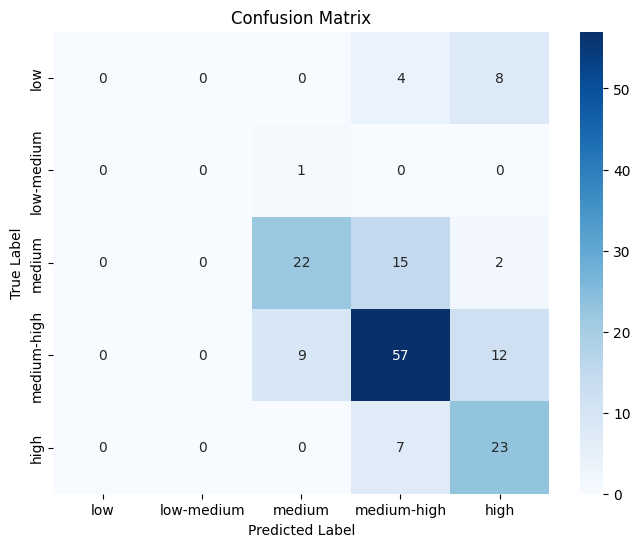

Classification Report:
              precision    recall  f1-score   support

         low       0.00      0.00      0.00        12
  low-medium       0.00      0.00      0.00         1
      medium       0.69      0.56      0.62        39
 medium-high       0.69      0.73      0.71        78
        high       0.51      0.77      0.61        30

    accuracy                           0.64       160
   macro avg       0.38      0.41      0.39       160
weighted avg       0.60      0.64      0.61       160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
num_rows = X_train.shape[0]
print("Number of rows in train:", num_rows)
num_rows2 = X_test.shape[0]
print("Number of rows in test:", num_rows2)


# evaluate
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# conf matrix
conf_mat = sklearn.metrics.confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_mat)

# ConfMatrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


60% is significant given the amount of data and guessing at random would be 20% across 5 classes. There are also probably some cases that are very close to the bin cutoff number and the margin is non-existant.